In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('spam_ham_dataset.csv');

In [7]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
df.shape

(5171, 4)

In [9]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website


## 1. Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [11]:
df.rename(columns={df.columns[0]: 'index','label_num':'target'},inplace=True)
df.sample(4)

,index,label,text,target
3479,2707,ham,Subject: tenaska iv 1 / 01\r\nwe need to chang...,0
4443,4179,spam,Subject: work full - time while earning your d...,1
1007,5026,spam,Subject: us hot sto - cks\r\nstructure technol...,1
119,315,ham,"Subject: nom for 2 / 17\r\nfor 2 / 17 , the no...",0


In [12]:
df.isnull().sum()

index     0
label     0
text      0
target    0
dtype: int64

In [13]:
df.duplicated().sum()

0

## 2. EDA

In [14]:
df['target'].value_counts()

target
0    3672
1    1499
Name: count, dtype: int64

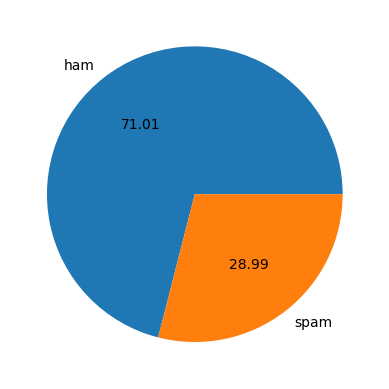

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
!pip install nltk

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,index,label,text,target,num_characters
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [21]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,index,label,text,target,num_characters,num_words
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [23]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,index,label,text,target,num_characters,num_words,num_sentences
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [26]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [27]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

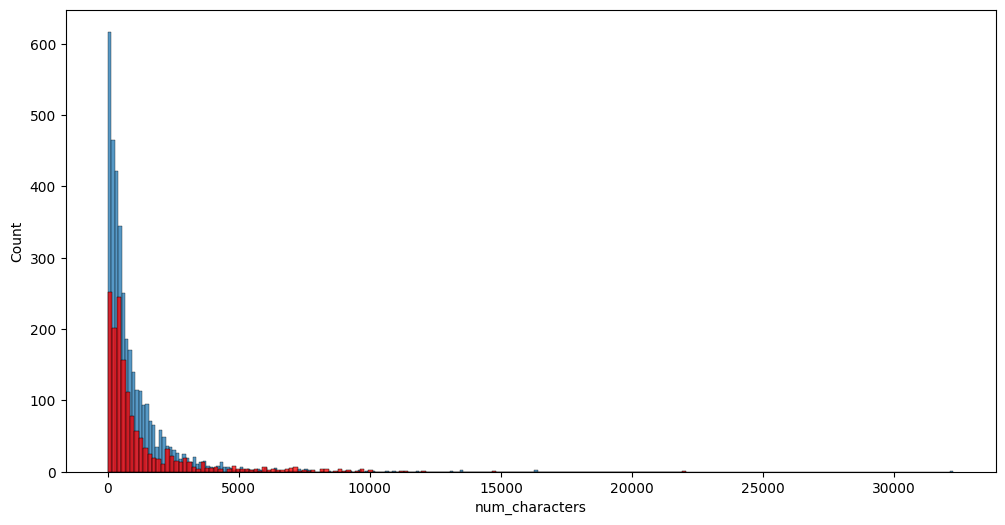

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

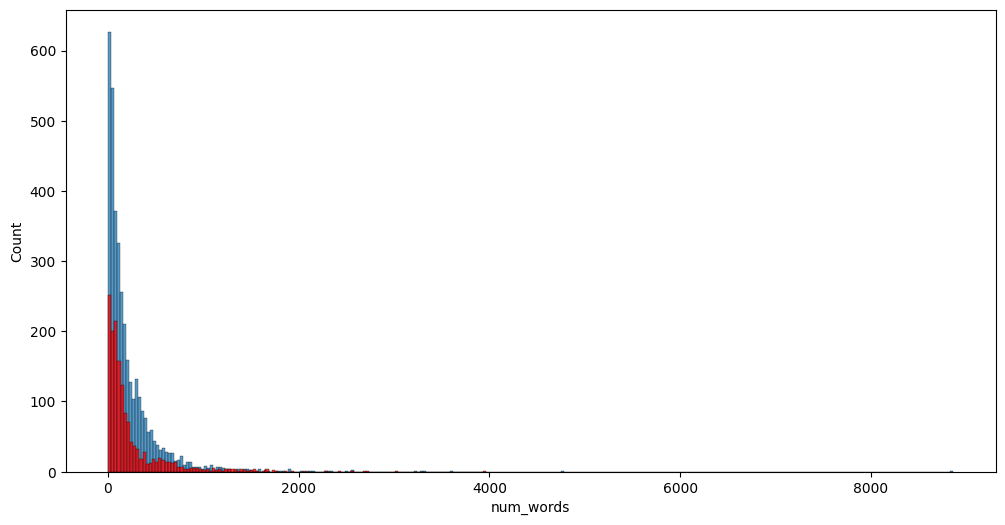

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

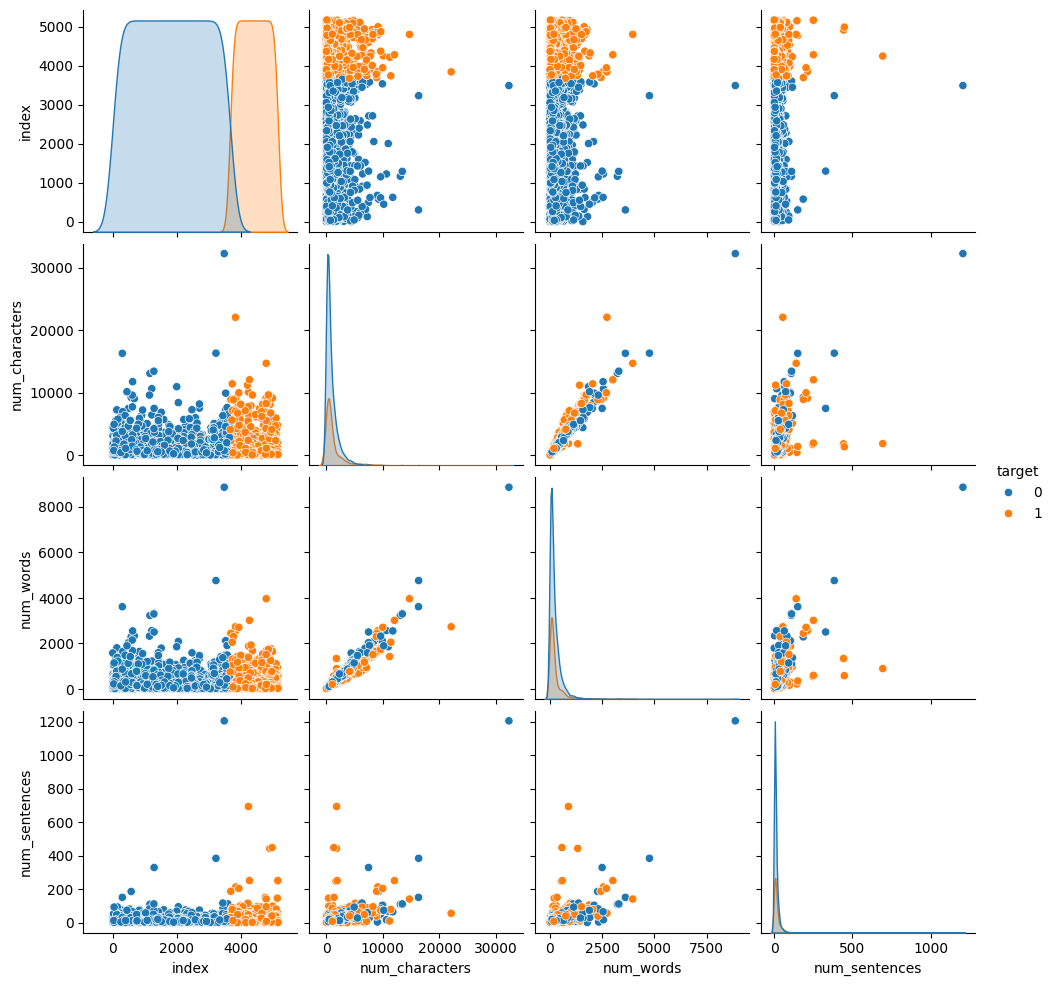

In [31]:
sns.pairplot(df,hue='target')

In [32]:
# df = df.select_dtypes(include=['number'])

# df.corr()

In [33]:
# sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
from nltk.corpus import stopwords

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [38]:
df['text'][55]

"Subject: adjusted deal ticket\r\ndaren / o ' neal ,\r\neffective 1 / 18 / 01 , deal ticket 137205 has been adjusted from a daily volume\r\nof 2 , 773 to 25 . the meter # is 9748 and the trade zone is 10 .\r\nbob"

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,index,label,text,target,num_characters,num_words,num_sentences,transformed_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

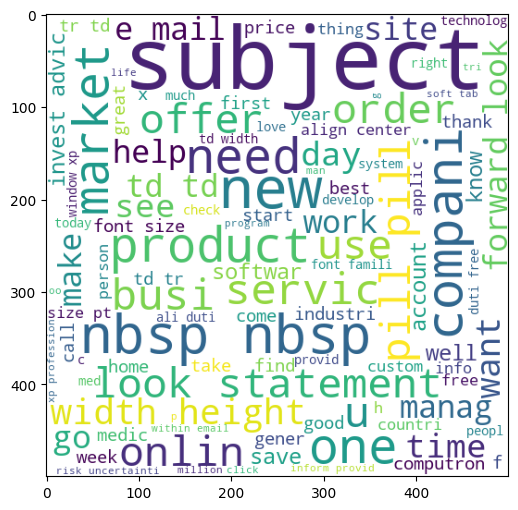

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

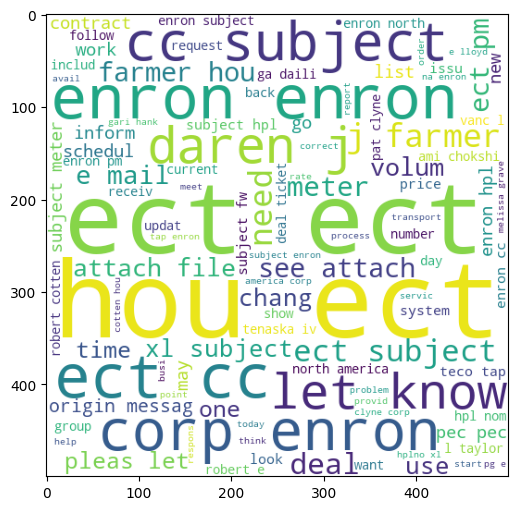

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
df.head()

,index,label,text,target,num_characters,num_words,num_sentences,transformed_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [47]:
spam_corpus = []
for mail in df[df['target'] == 1]['transformed_text'].tolist():
    for word in mail.split():
        spam_corpus.append(word)
        

In [48]:
len(spam_corpus)

197452

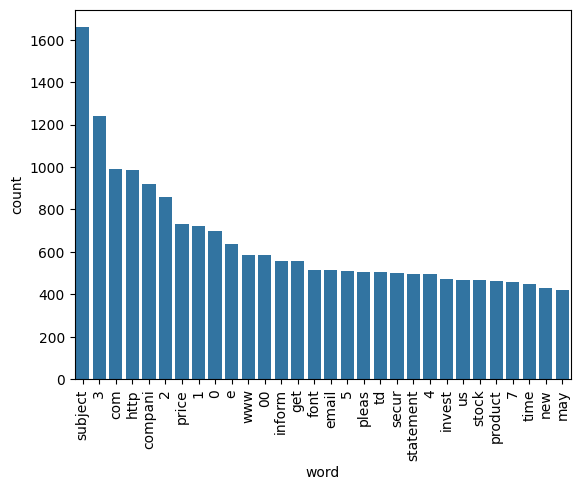

In [49]:

from collections import Counter

common_words = Counter(spam_corpus).most_common(30)

common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [50]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

388650

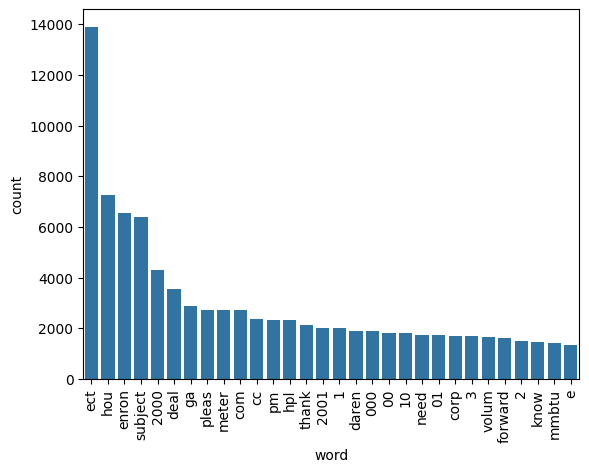

In [52]:
from collections import Counter

common_words = Counter(ham_corpus).most_common(30)

common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [53]:
df.head()

,index,label,text,target,num_characters,num_words,num_sentences,transformed_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


## 4. Model Building

In [102]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [103]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [104]:
X.shape

(5171, 3000)

In [105]:
y = df['target'].values

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
from scipy.sparse import issparse

if issparse(X_train):
    X_train = X_train.toarray()
if issparse(X_test):
    X_test = X_test.toarray()

In [110]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [111]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [112]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9623188405797102
[[717  29]
 [ 10 279]]
0.9058441558441559


In [63]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9458937198067633
[[703  43]
 [ 13 276]]
0.8652037617554859


In [64]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9169082125603865
[[690  56]
 [ 30 259]]
0.8222222222222222


In [65]:
# tfidf --> GNB

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [69]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [70]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9826086956521739, 0.9531772575250836)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9826086956521739
Precision -  0.9531772575250836
For  KN
Accuracy -  0.9739130434782609
Precision -  0.9678571428571429
For  NB
Accuracy -  0.9458937198067633
Precision -  0.8652037617554859
For  DT
Accuracy -  0.8415458937198068
Precision -  0.6456876456876457
For  LR
Accuracy -  0.9690821256038648
Precision -  0.9269102990033222
For  RF
Accuracy -  0.978743961352657
Precision -  0.9556313993174061
For  AdaBoost
Accuracy -  0.9632850241545894
Precision -  0.9087947882736156
For  BgC
Accuracy -  0.9545893719806763
Precision -  0.9006622516556292
For  ETC
Accuracy -  0.9835748792270531
Precision -  0.9563758389261745
For  GBDT
Accuracy -  0.9439613526570049
Precision -  0.9110320284697508
For  xgb
Accuracy -  0.9719806763285024
Precision -  0.922077922077922


In [72]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.973913,0.967857
8,ETC,0.983575,0.956376
5,RF,0.978744,0.955631
0,SVC,0.982609,0.953177
4,LR,0.969082,0.926910
10,xgb,0.971981,0.922078
9,GBDT,0.943961,0.911032
6,AdaBoost,0.963285,0.908795
7,BgC,0.954589,0.900662
2,NB,0.945894,0.865204


In [74]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [75]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.973913
1,ETC,Accuracy,0.983575
2,RF,Accuracy,0.978744
3,SVC,Accuracy,0.982609
4,LR,Accuracy,0.969082
5,xgb,Accuracy,0.971981
6,GBDT,Accuracy,0.943961
7,AdaBoost,Accuracy,0.963285
8,BgC,Accuracy,0.954589
9,NB,Accuracy,0.945894


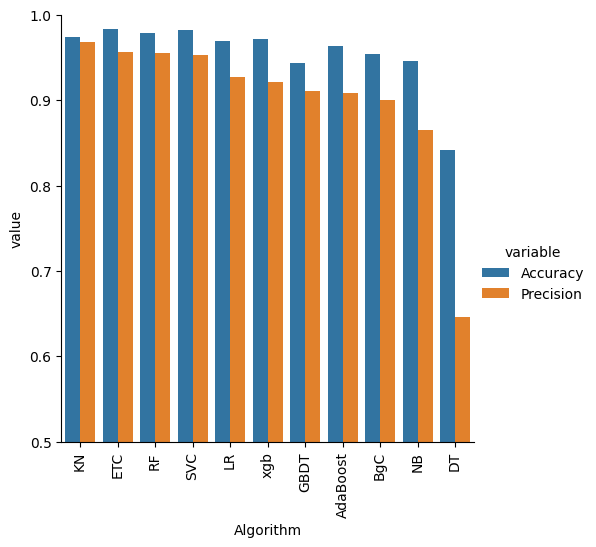

In [76]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
gnb = GaussianNB()
knc = KNeighborsClassifier(n_neighbors=5) 

from sklearn.ensemble import VotingClassifier

In [83]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', gnb), ('nc', knc)],voting='soft')

In [84]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', GaussianNB()),
                             ('nc', KNeighborsClassifier())],
                 voting='soft')

In [82]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806763285024155
Precision 0.946843853820598


In [86]:
# Applying stacking
estimators=[('svm', svc), ('nb', gnb), ('nc', knc)]
final_estimator=RandomForestClassifier()

In [87]:
from sklearn.ensemble import StackingClassifier

In [88]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [89]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9826086956521739
Precision 0.9531772575250836


In [113]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(gnb,open('model.pkl','wb'))